[*********************100%%**********************]  1 of 1 completed


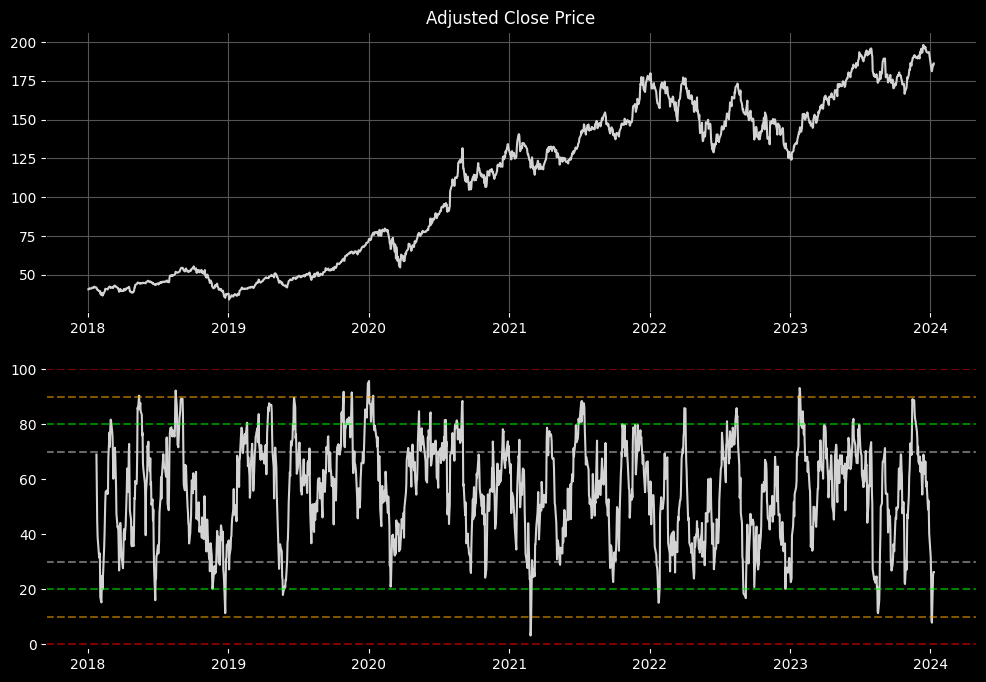

In [7]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt

ticker = 'AAPL'
start = dt.datetime(2018, 1, 1)
end = dt.datetime.now()

data = yf.download(ticker, start=start, end=end)

delta = data['Adj Close'].diff(1)
delta.dropna(inplace=True)

positive = delta.copy()
negative = delta.copy()

positive[positive < 0] = 0
negative[negative > 0] = 0

days = 14

average_gain = positive.rolling(window=days).mean()
average_loss = abs(negative.rolling(window=days).mean())

relative_strength = average_gain / average_loss
RSI = 100.0 - (100.0 / (1.0 + relative_strength))

combined = pd.DataFrame()
combined['Adj Close'] = data['Adj Close']
combined['RSI'] = RSI

plt.figure(figsize=(12,8))
ax1 = plt.subplot(211)
ax1.plot(combined.index, combined['Adj Close'], color='lightgray')
ax1.set_title("Adjusted Close Price", color='white')

ax1.grid(True, color='#555555')
ax1.set_axisbelow(True)
ax1.set_facecolor('black')
ax1.figure.set_facecolor('black')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')

ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(combined.index, combined['RSI'], color='lightgray')
ax2.axhline(0, linestyle='--', alpha=0.5, color='#ff0000')
ax2.axhline(10, linestyle='--', alpha=0.5, color='#ffaa00')
ax2.axhline(20, linestyle='--', alpha=0.5, color='#00ff00')
ax2.axhline(30, linestyle='--', alpha=0.5, color='#cccccc')
ax2.axhline(70, linestyle='--', alpha=0.5, color='#cccccc')
ax2.axhline(80, linestyle='--', alpha=0.5, color='#00ff00')
ax2.axhline(90, linestyle='--', alpha=0.5, color='#ffaa00')
ax2.axhline(100, linestyle='--', alpha=0.5, color='#ff0000')

ax2.set_title('RSI Value')
ax2.grid(False)
ax2.set_axisbelow(True)
ax2.set_facecolor('black')
ax2.tick_params(axis='x', colors='white')
ax2.tick_params(axis='y', colors='white')

plt.show()
